In [4]:
# Import important libraries to be used in the notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Import the CardioGoodFitness.csv into a data frame
data = pd.read_csv("./data_sets/CardioGoodFitness.csv")

# Sanity Checks

## Dataset preview and shape

In [6]:
# Sample first 5 rows of the data to confirm loading
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
# Sneek peak into the data dimension using shape function of the data frame object
data.shape

(180, 9)

- The data consists if 180 rows and 9 columns

## Data Types

In [8]:
#Sneak peak into the dataset's data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- The data consists of 3  category variables and 6 Numerical Variables
- Product, Gender,  Marital Status are the category variables in the dataset
- Age, Education, Usage, Fitness, Income and Miles are the Numerical variables (type int) in the dataset

## Statistical Summary

In [9]:
# Statistical summary of the dataset 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


- The shop sells 3 product types with TM195 product being the top selling product representing 44% of the sales
- Customers are aged between 18 and 50 years
- The average age of the customers buying the products is 28
- 50% of the customers are aged 26 years and above while 75% of customers are aged above 33 years
- 57% of the total customers are of male gender
- The education experience ranges between 12 and 21 years
- The average education experience in years is 15.5 approx 16 years
- 50% and 75% of the customers have an education experience of 16 years and above
- Customers are either Partnered or Single
- 59% of the total customers are partnered while 41 % are Single 
- Customers expect use their treadmills averagely 3 times a week
- The average fitness is 3 representing more than 50%.
- Given that the range if fitness is between 1 to 5, we can infer that majority of the customers are moderately fit
- The average income is  USD 53,719. 75% of the customers income is above US 58k
- The average mileage that customers expect to run is 103 

## Check for missing values

In [10]:
# Check for missing data in the dataset
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no missing values in our dataset

# Univariate Analysis

## Check distribution on Numerical columns

### Observations on Age

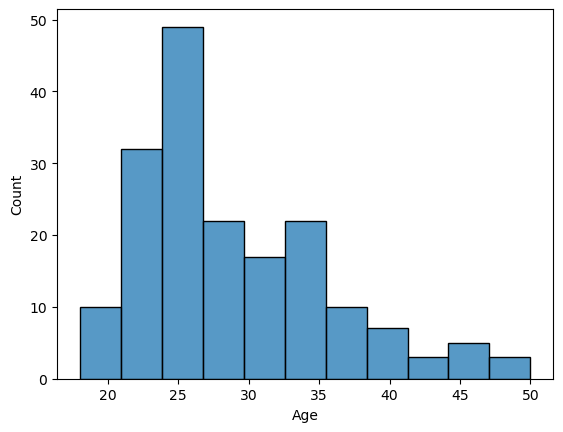

In [11]:
sns.histplot(data=data,x='Age')
plt.show()

In [12]:
## Lets try to Bin the Age variable for indepth analysis of age
pd.cut(data['Age'],5).value_counts()

(24.4, 30.8]      66
(17.968, 24.4]    54
(30.8, 37.2]      35
(37.2, 43.6]      16
(43.6, 50.0]       9
Name: Age, dtype: int64

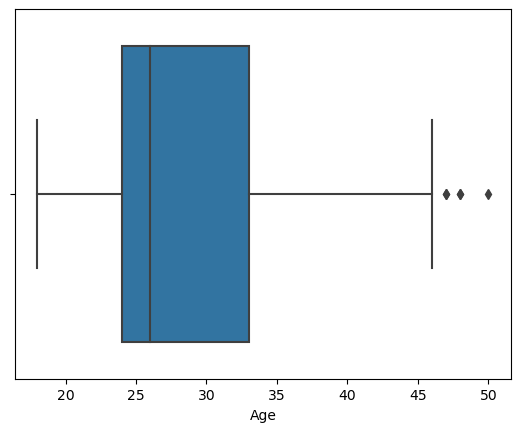

In [13]:
sns.boxplot(data=data,x='Age')
plt.show()

- The distribution of Age is skewed towards the right
- We observe majority of customers are aged between 24 & 31, followed by ages 18 -24, 31 - 37, 37 -43 respectively
- From the box plot, There are few outliers indicating that we have few exceptions of customers aged above 45
- Lets find out how many customers are aged above the max non outlier age of 45

In [14]:
data.loc[data['Age'] > 45].shape

(6, 9)

- We have 6 customers aged above 45 years. The rest are aged between 18 and 45 years

### Observations on Education

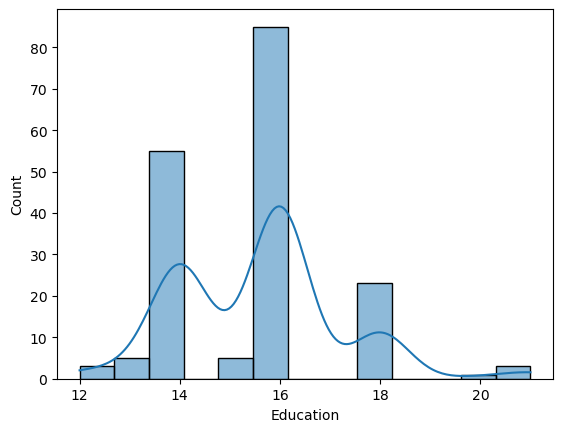

In [15]:
sns.histplot(data=data,x='Education', kde=True)
plt.show()

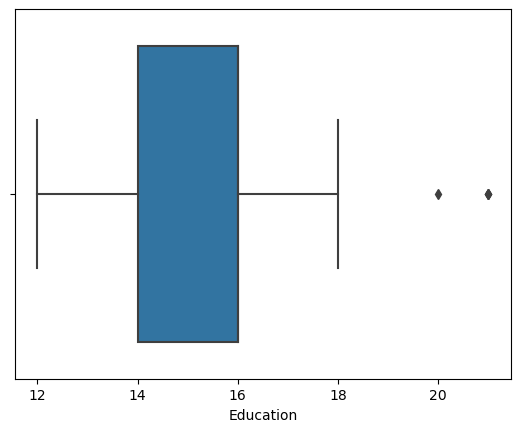

In [16]:
sns.boxplot(data=data,x='Education')
plt.show()

- The distribution of Education is normal. Evenly ditributed.
- We observe majority of customers have an Education experience of 14-16 years
- We have outliers indicating education experience of over 18 years. 

### Observations on Usage

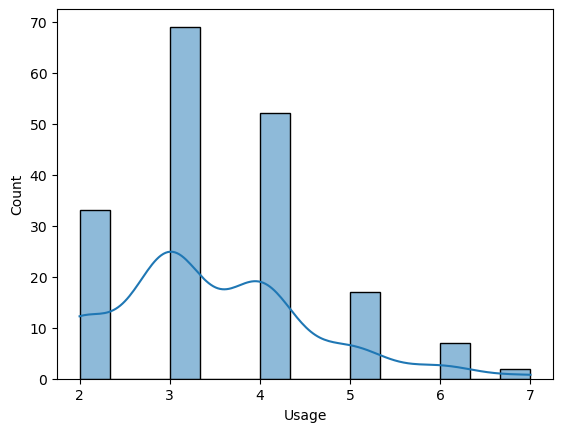

In [17]:
##Histplot

sns.histplot(data=data,x='Usage', kde=True)
plt.show();

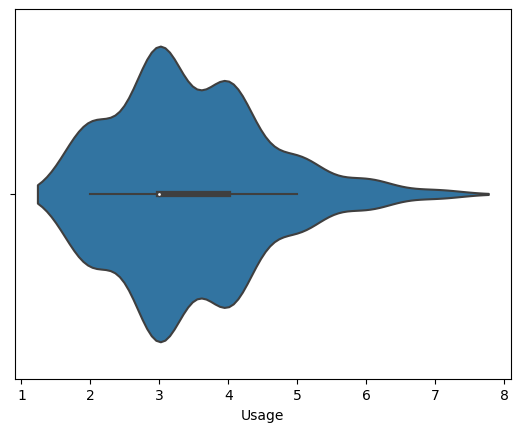

In [18]:
##Violin Plot
sns.violinplot(data=data,x='Usage', )
plt.show()

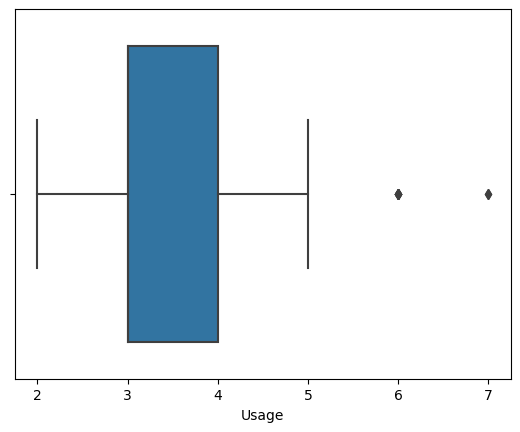

In [19]:
##Box Plot
sns.boxplot(data=data,x='Usage', )
plt.show()

- The distribution of usage is skewed towards the right
- The most predetermined usage recorded is between 3-4 times a week.
- 2 Outliers observed (customer expected usage  6-7 times a week)
- Let us find out how many customers have a predermined usage of more than 5

In [20]:
data.loc[data['Usage']>5].shape

(9, 9)

- There are only 9 such customers

### Observations on Fitness

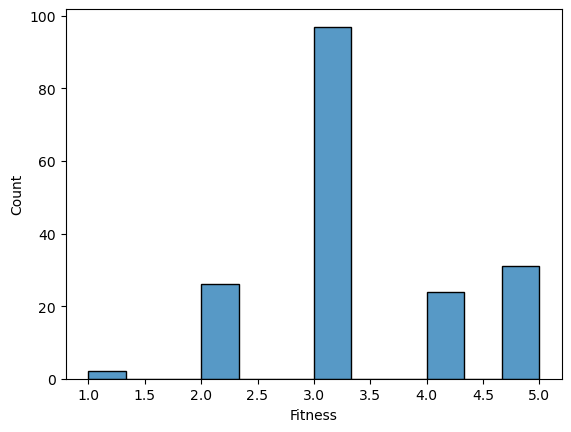

In [21]:
sns.histplot(x='Fitness', data=data);
plt.show();

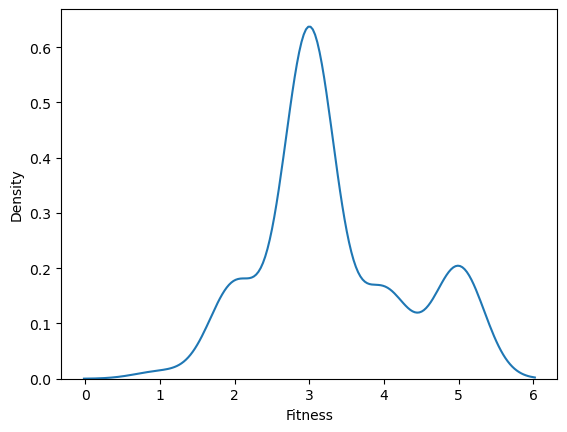

In [22]:
#KDE Plot
sns.kdeplot(x='Fitness', data=data)
plt.show();

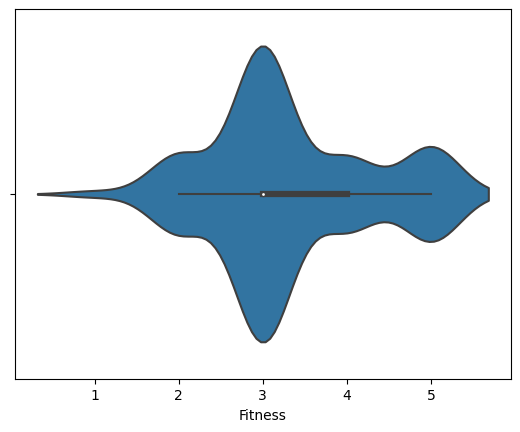

In [23]:
#Violin Plot
sns.violinplot(x=data["Fitness"]);
plt.show();

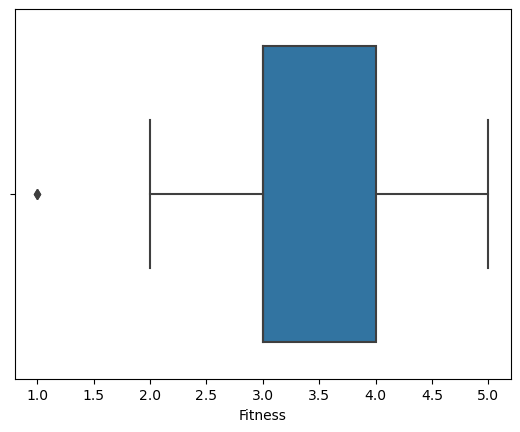

In [24]:
sns.boxplot(data=data,x='Fitness', )
plt.show()

- The distribution of Fitness is skewed towards the left
- 1 Outlier observed with fitness level 1
- Let us find out how many customers have a fitness level of less than minimum non outlier 2

data[data['Fitness'] < 2].shape

- We observe that we have 2 customers with a fitness of below 2

### Observations on Income

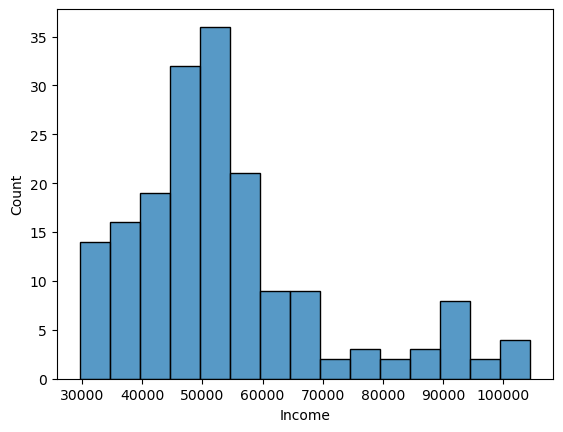

In [25]:
sns.histplot(x=data["Income"]);
plt.show();

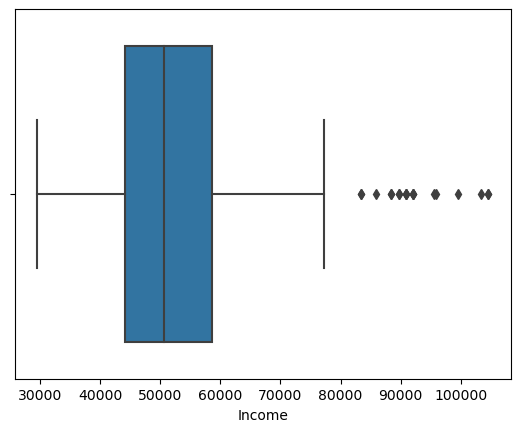

In [26]:
sns.boxplot(x=data["Income"]);
plt.show();

* The distribution of Income is skewed towards the right.
* The values seem fine as the individual income depends upon various factors depending on each individual e.g Age
* There are few outliers in this variable and the values above **75000** are being represented as outliers by the boxplot. 
* Let us check how many customers have an income of more than 75000

In [27]:
data.loc[data['Income'] > 75000].shape

(21, 9)

- We have 21 customers with an income of 75000 and above

### Observations on Miles

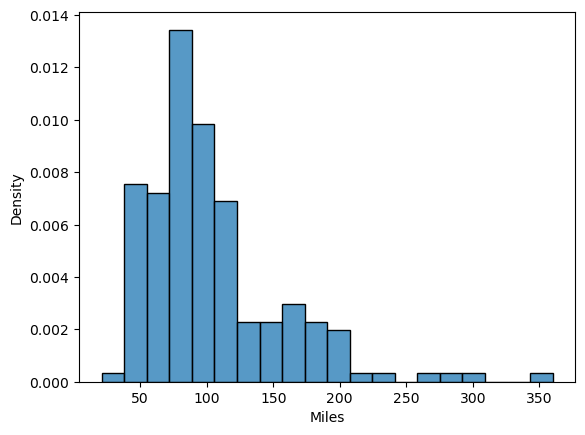

In [28]:
sns.histplot(data=data,x='Miles',stat='density')
plt.show()


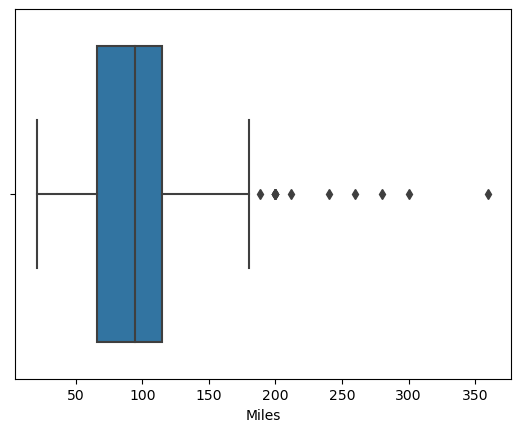

In [29]:
sns.boxplot(data=data,x='Miles')
plt.show()

* The distribution is skewed towards the right.
* There are a few outliers present in this column. 
* Values above 170 Miles are being represented as outliers in the boxplot

In [30]:
data.loc[data['Miles'] > 170].shape

(19, 9)

- We have 19 such customers

## Check distribution on Non-Numerical columns

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### Observations on Gender

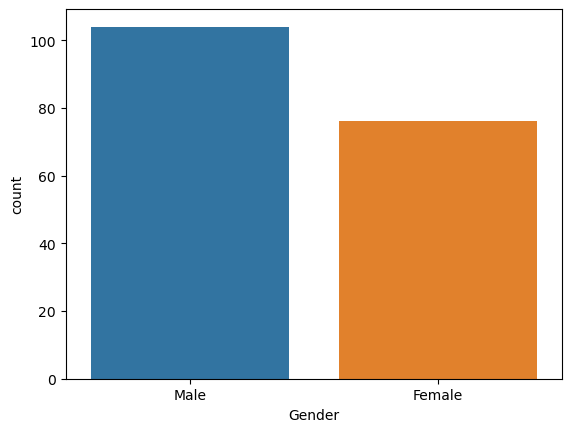

In [32]:
sns.countplot(data=data,x='Gender')

plt.show()

- Around 58% of the customers are male

### Observation on Marital Status

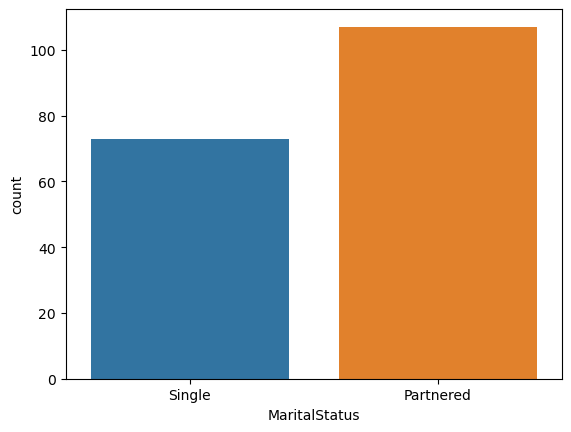

In [33]:
sns.countplot(data=data,x='MaritalStatus')

plt.show()

- Around 59% of the customers have 'Partnered' as their marital status 

### Observations on Product

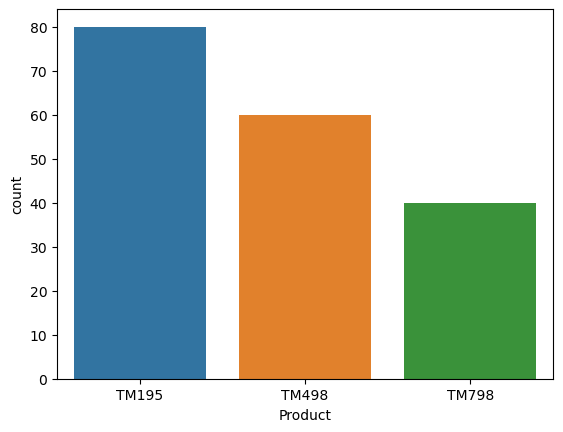

In [34]:
sns.countplot(data=data,x='Product')

plt.show()

- Product with model number TM195 is maximum in number. Seems to be the most preferred product representing 44% of the total sale
- This is followed by products with model number TM498, TM798 with 33% and 22% respectively. 

# Bivariate Analysis

#### Correlation Matrix

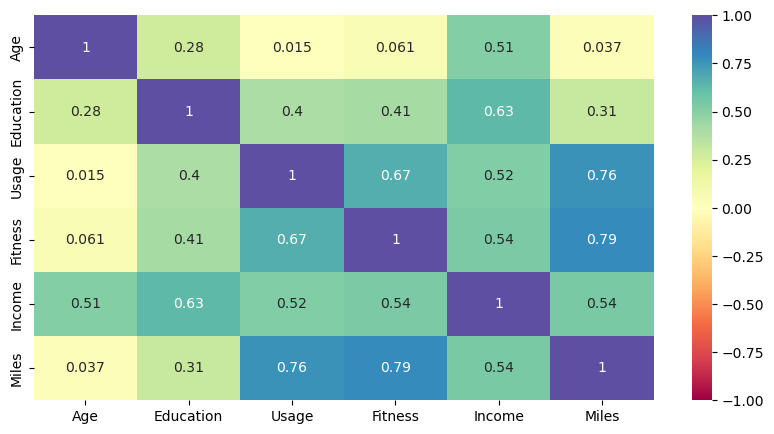

In [35]:
# Review variable correlation using a heat map
plt.figure(figsize=(10,5)) #set the fugure size
sns.heatmap(data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1) #use hetmap function from the SNS library 
plt.show()

**Observations**
* Miles column shows a high correlation with usgae,fitness. This indicates that more miles that a customer intends to run, the higher the self rated fitness and the intended usage.
* Education shows a positive correlation with the Income column. This indicates that the higher the Education experience the higher the income.
* Usage shows a positve correlation with Fitness. Which makes sense since the more fit the customer is the higher the usage.
* We observe a weak correlation between age and usage, fitness ,miles columns. The higher the age the less the usage. 
* We also observe a positive strong correlation between Education and Usage, fitness. 


### Let us observe the product preference amongst age groups and gender**

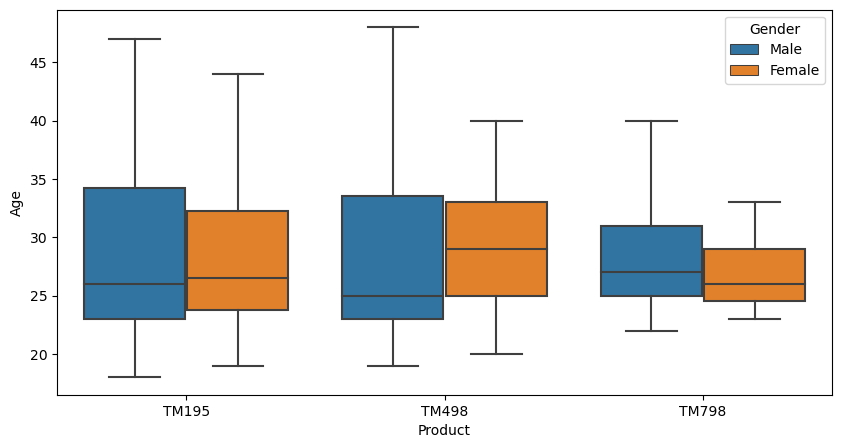

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data,x='Product',y='Age', hue='Gender', showfliers=False)
plt.show()

* We observe that customers base is largely male across all products.
* Majority of male customers between the ages 22-34 prefer the TM195 product.
* Product TM498 is the most preferred product amongst Female customers between the ages 25 and 35
* Product TM798 is least preferred product across male and female customers

### Analysis of age, Income and product preference amongst customers**

In [37]:
# Categorizing age into age groups for easier analyisy

bins=[10,20,30,40,50]
labels=['10-20','20-30', '30-40','40-50']
data['Age Group'] = pd.cut(x=data['Age'],bins=bins,labels=labels,right=False)



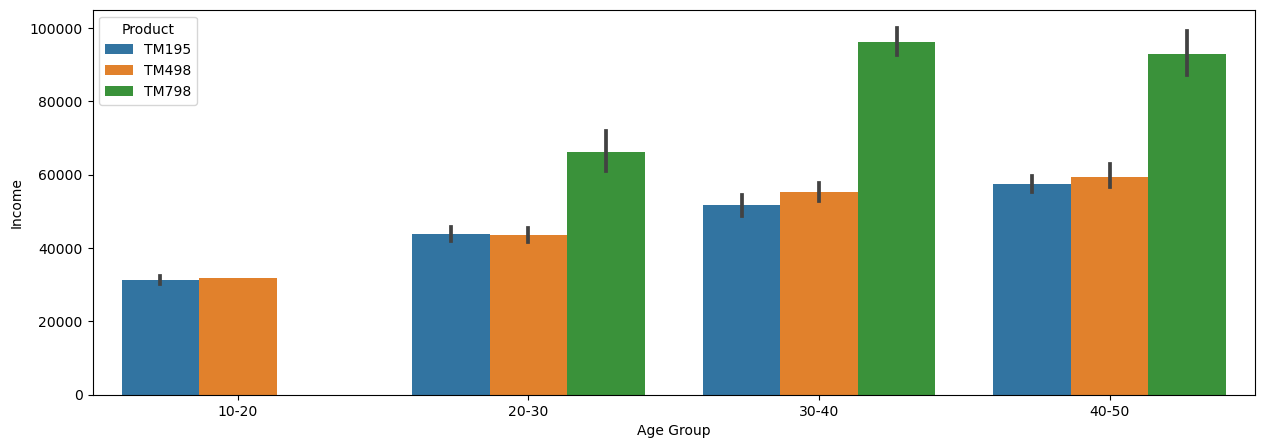

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Age Group',y='Income',hue='Product')
plt.show()


* Products TM195 & TM498 preference is evenly dsitributed amongst all age groups
* Product TM798 is  the most preferred product across  age groups 20-30, 30-40 and 40-50
* We observe Age group 10-20 having the lowest incomes. 
* Product TM798 is most preferred amongst customers with incomes above 40,000 and ages 20 and above



### Analysis of income and marital status

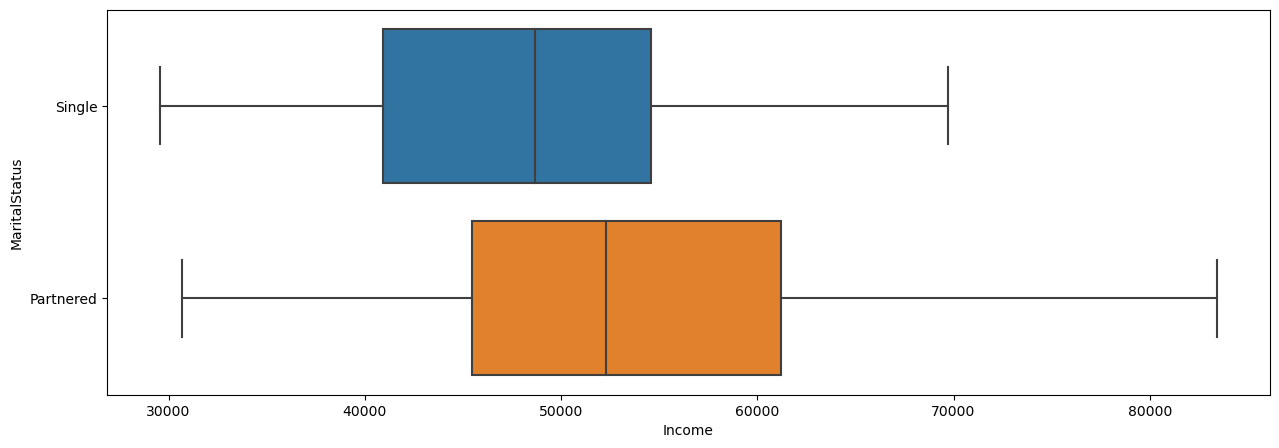

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x='Income',y='MaritalStatus', showfliers=False)
plt.show()

**We observe higher incomes amongst customers with 'Partnered' marital status than amongst customers with 'Single' marital status**

### Analysis of income and Education

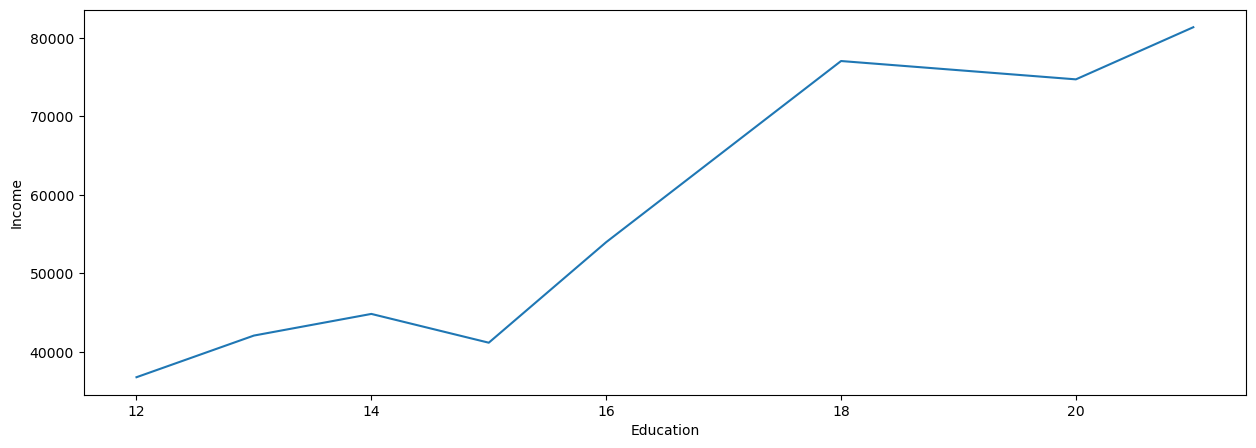

In [40]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,y='Income',x='Education',ci=None)
plt.show()

**We observe a strong correlation between education and income. Customers with higher education seem to have higher incomes**

## Analysis of usage and Income

In [41]:
#We will sub-divide income into ranges using cut function from pandas library and create a new column 'Income Range'
data['Income Range'] = pd.cut(data['Income'], bins=[30000,50000,70000,90000,110000],right=False)

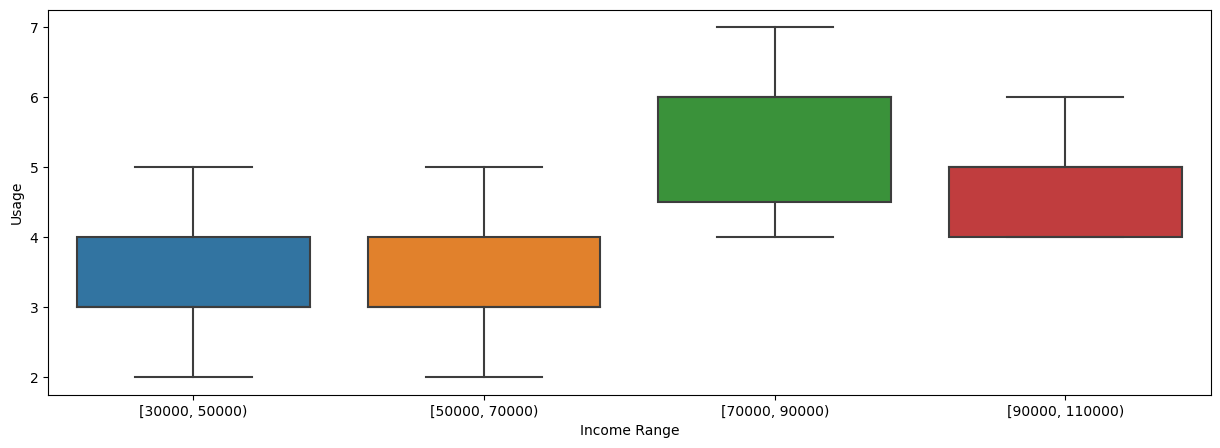

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='Usage',x='Income Range',showfliers=False)
plt.show();

**We observe that the usage is highest amongst customers with incomes between 70,000 - 90,000**

## Analysis of  Usage & product

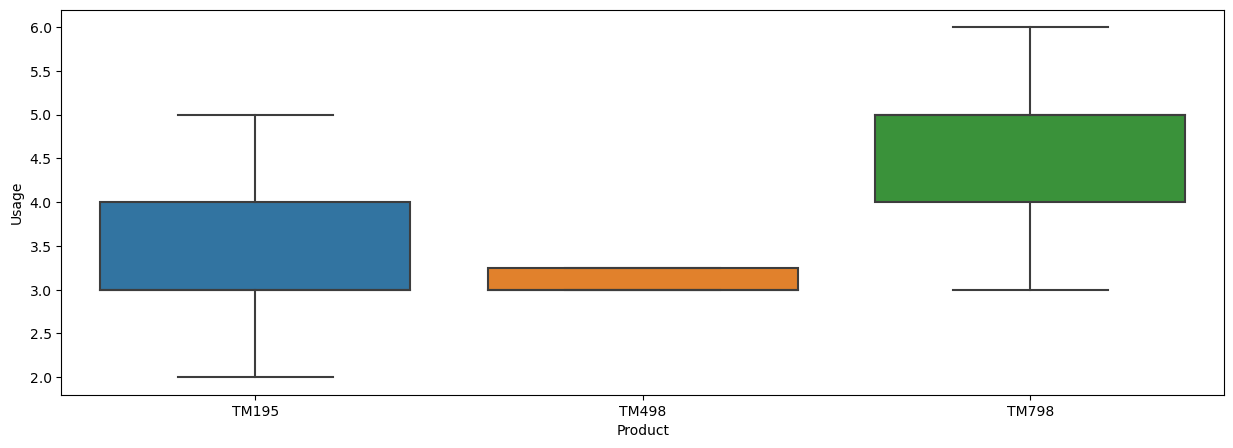

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,y='Usage',x='Product',showfliers=False)
plt.show()

**Product TM798 projected usage is 3-6 times a week making it the mostly used product followed by TM195, TM498 respectively**

# Conclusions

* Product TM195 product is the most popular product amongst customers
* We observe a weak correlation between age and usage, fitness and miles. The higher the age the less the usage. We can conclude that the younger customers are more likely to use a trendmil more that older customers.
* We also observe a positive strong correlation between Education and Usage, fitness. We can conclude that the more educated/informed customers are the more they are likely to buy the fitness products.
* Given that the range if fitness is between 1 to 5, we can conclude that majority of the customers are moderately fit and are likely to buy fitness products to maintain fitness
* It is encouraging to see that Product TM498 is the most preferred product amongst Female customers between the ages 25 and 35
* Product TM798 is least preferred product across male and female customers
* Partnered customers have a higher income than single customers hence more purchasing power




# Recommendations

* The shop needs to invest in specific fitness products For customers aged between 24 & 31. This age group forms the majority and most of them earn above 40,000 
* Customers with partnered marital status are more likely to purchase fitness products due to their high purchasing power. The shop can sell tailor made products for this category of customers
* Customers with higher education have higher incomes than those with lower education hence most likely to buy fitness products. The shop can invest in providing more information about the products to target this group
* We need to investigate the low demand for Product TM798 as it is the least preferred product across male and female customers
* We need to further investigate the low usage of product TM498
* We need more data on the product pricing to build a model that can predict the optimum pricing for the products
* The retail shop should increase the stock of TM798 product. Seems favorite across


